In [ ]:
!pip install h2o4gpu

     |████████████████████████████████| 346.3MB 43kB/s 
     |████████████████████████████████| 460kB 50.8MB/s 
     |████████████████████████████████| 6.7MB 46.9MB/s 
  Created wheel for psutil: filename=psutil-5.7.2-cp36-cp36m-linux_x86_64.whl size=279864 sha256=fef4ebe3731025a3c65a7708a1f0e79630c537c674eaed3d3581b776c40c2733
  Stored in directory: /root/.cache/pip/wheels/39/a0/f5/c4fa280463e29aea07797acb5312358fefb067c1f4f98e11b1
Successfully built psutil
  Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from h2o4gpu.solvers import KMeans

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/dataset_desafio_2.csv')

In [ ]:
display(df.head(10))

MATRICULA                         NOME  ...  FALTAS       PERFIL
0     502375            Márcia Illiglener  ...       3       EXATAS
1     397093     Jason Jytereoman Izoimum  ...       3       EXATAS
2     915288    Bartolomeu Inácio da Gama  ...       3      HUMANAS
3     192652              Fernanda Guedes  ...       4  DIFICULDADE
4     949491       Alessandre Borba Gomes  ...       5  DIFICULDADE
5     627360    Magali Hellen Gejibaflião  ...       5      HUMANAS
6     804493            Tiago Brisu Pires  ...       6  DIFICULDADE
7     433789  Andressa Gabrielle da Silva  ...       6  DIFICULDADE
8     178335         Gilmar Oséas Etonvic  ...       4  DIFICULDADE
9     987229          Otávia Mônica Noopu  ...       3       EXATAS

[10 rows x 15 columns]

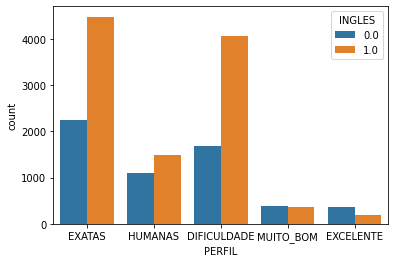

In [ ]:
sns.countplot(x='PERFIL', hue='INGLES', data=df)

In [ ]:
df_data = df.drop(['NOME', 'MATRICULA', 'INGLES'], axis=1)

In [ ]:
res = list(df_data.isnull().sum().items())
print(res)
print(len(df_data))

[('REPROVACOES_DE', 0), ('REPROVACOES_EM', 0), ('REPROVACOES_MF', 0), ('REPROVACOES_GO', 0), ('NOTA_DE', 0), ('NOTA_EM', 0), ('NOTA_MF', 0), ('NOTA_GO', 3716), ('H_AULA_PRES', 0), ('TAREFAS_ONLINE', 0), ('FALTAS', 0), ('PERFIL', 0)]
20000


In [ ]:
df_data = df_data.dropna(axis=0, subset=['NOTA_GO'])

In [ ]:
df_data.describe()              #IS IT NECESSARY TO SCALE THE DATA????????????????????????????

REPROVACOES_DE  REPROVACOES_EM  ...  TAREFAS_ONLINE        FALTAS
count    16284.000000    16284.000000  ...    16284.000000  16284.000000
mean         0.244289        0.242569  ...        3.142840      4.064665
std          0.618464        0.613561  ...        1.855688      1.681969
min          0.000000        0.000000  ...        0.000000      1.000000
25%          0.000000        0.000000  ...        2.000000      3.000000
50%          0.000000        0.000000  ...        3.000000      4.000000
75%          0.000000        0.000000  ...        5.000000      6.000000
max          3.000000        3.000000  ...        7.000000      8.000000

[8 rows x 11 columns]

In [ ]:
X = df_data.drop('PERFIL', 1)
y = df_data['PERFIL']

**MODELOS DE CLASSIFICACAO MULTI-LABEL**

sklearn.naive_bayes.BernoulliNB

sklearn.tree.DecisionTreeClassifier

sklearn.tree.ExtraTreeClassifier

sklearn.ensemble.ExtraTreesClassifier

sklearn.naive_bayes.GaussianNB

sklearn.neighbors.KNeighborsClassifier

sklearn.semi_supervised.LabelPropagation

sklearn.semi_supervised.LabelSpreading

sklearn.discriminant_analysis.LinearDiscriminantAnalysis

sklearn.svm.LinearSVC (setting multi_class=”crammer_singer”)

sklearn.linear_model.LogisticRegression (setting multi_class=”multinomial”)

sklearn.linear_model.LogisticRegressionCV (setting multi_class=”multinomial”)

sklearn.neural_network.MLPClassifier

sklearn.neighbors.NearestCentroid

sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis

sklearn.neighbors.RadiusNeighborsClassifier

sklearn.ensemble.RandomForestClassifier

sklearn.linear_model.RidgeClassifier

sklearn.linear_model.RidgeClassifierCV

In [ ]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC #(setting multi_class=”crammer_singer”)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV #(both setting multi_class=”multinomial”)
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV

from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
models = [BernoulliNB(), GaussianNB(), DecisionTreeClassifier(), ExtraTreeClassifier(), ExtraTreesClassifier(), RandomForestClassifier(), KNeighborsClassifier(), LabelPropagation(),
          LabelSpreading(), LinearDiscriminantAnalysis(), LinearSVC(multi_class='crammer_singer'), LogisticRegression(multi_class='multinomial'), LogisticRegressionCV(multi_class='multinomial'), 
          MLPClassifier(), NearestCentroid(), QuadraticDiscriminantAnalysis(), RidgeClassifier(), RidgeClassifierCV()]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [ ]:
scores = []

control = 0
for model in models:
  print(control)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, pred)
  score_dict = {control: accuracy}  
  control += 1
  scores.append(score_dict)

0
1
2
3
4
5
6
7
8
9
10


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


11


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


12


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


13
14
15
16
17


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


In [ ]:
display(scores)

[{0: 0.6212232866617539},
 {1: 0.3795136330140015},
 {2: 0.7312699582412183},
 {3: 0.7266028002947679},
 {4: 0.8044706460329157},
 {5: 0.805698845492508},
 {6: 0.7433063129452223},
 {7: 0.7042495701301892},
 {8: 0.706951608941292},
 {9: 0.7374109555391796},
 {10: 0.7848194546794399},
 {11: 0.7406042741341193},
 {12: 0.8071726848440187},
 {13: 0.7887496929501351},
 {14: 0.6082043723900762},
 {15: 0.412183738639155},
 {16: 0.7084254482928027},
 {17: 0.7084254482928027}]

In [ ]:
for i in range(len(scores)):
  if scores[i][i] > 0.75:
    print(scores[i])
    print(models[i])

{4: 0.8044706460329157}
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
{5: 0.805698845492508}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
thispred = models[13].predict(X_test)
print(classification_report(y_test, thispred))
print(confusion_matrix(y_test, thispred))

NotFittedError: ignored

e se removermos zeros?

In [ ]:
dfno0 =df_data[df_data['NOTA_DE'] !=0]
dfno0 =df_data[df_data['NOTA_EM'] !=0]
dfno0 =df_data[df_data['NOTA_MF'] !=0]
dfno0 =df_data[df_data['NOTA_GO'] !=0]

X0 = dfno0.drop('PERFIL', 1)
y0 = dfno0['PERFIL']

In [ ]:
print(len(dfno0))

12747


In [ ]:
models = [BernoulliNB(), GaussianNB(), DecisionTreeClassifier(), ExtraTreeClassifier(), ExtraTreesClassifier(), RandomForestClassifier(), KNeighborsClassifier(), LabelPropagation(),
          LabelSpreading(), LinearDiscriminantAnalysis(), LinearSVC(multi_class='crammer_singer'), LogisticRegression(multi_class='multinomial'), LogisticRegressionCV(multi_class='multinomial'), 
          MLPClassifier(), NearestCentroid(), QuadraticDiscriminantAnalysis(), RidgeClassifier(), RidgeClassifierCV()]

X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size = 0.25)

In [ ]:
scores0 = []

control = 0
for model in models:
  print(control)
  model.fit(X0_train, y0_train)
  pred = model.predict(X0_test)
  accuracy = metrics.accuracy_score(y0_test, pred)
  score_dict = {control: accuracy}  
  control += 1
  scores0.append(score_dict)

0
1
2
3
4
5
6
7
8
9
10


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


11


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


12


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


13


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


14
15
16
17


In [ ]:
display(scores0)

[{0: 0.52149356761845},
 {1: 0.6768120489488547},
 {2: 0.6655161593975526},
 {3: 0.6350800125509883},
 {4: 0.7536868528396611},
 {5: 0.761531220583621},
 {6: 0.6815186695952307},
 {7: 0.6385315343583308},
 {8: 0.6397866331973643},
 {9: 0.7483526827737684},
 {10: 0.7379981173517415},
 {11: 0.6821462190147474},
 {12: 0.7618449952933793},
 {13: 0.7574521493567619},
 {14: 0.41543771572011295},
 {15: 0.5202384687794164},
 {16: 0.6874803890806401},
 {17: 0.6874803890806401}]

In [ ]:
for i in range(len(scores0)):
  if scores0[i][i] > 0.75:
    print(scores0[i])
    print(models[i])

{4: 0.7536868528396611}
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
{5: 0.761531220583621}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100

In [ ]:
thispred0 = models[13].predict(X0_test)
print(classification_report(y0_test, thispred0))
print(confusion_matrix(y0_test, thispred0))

              precision    recall  f1-score   support

 DIFICULDADE       0.62      0.31      0.41       556
      EXATAS       0.78      0.94      0.85      1658
   EXCELENTE       0.62      0.60      0.61       139
     HUMANAS       0.79      0.90      0.84       667
   MUITO_BOM       0.18      0.04      0.07       167

    accuracy                           0.76      3187
   macro avg       0.60      0.56      0.56      3187
weighted avg       0.72      0.76      0.72      3187

[[ 171  360    0   25    0]
 [  97 1554    0    2    5]
 [   0    4   84   39   12]
 [   6   32   16  598   15]
 [   0   34   35   91    7]]


PELA FORMA COMO OS ZEROS ESTAO DISTRIBUITOS, PARECEM SER PROVAS NAO FEITAS (POR ESTAREM LONGE DA DISTRIBUIÇAO DO RESTO DAS NOTAS) POREM NOTA-SE QUE SAO NECESSARIOS PARA A CLASSIFICAÇAO (ou necessitam tratamento e nao remoçao)

#MODELOS PARA APROFUNDAR:
##ExtraTreesClassifier
##RandomForestClassifier
##LinearSVC
##LogisticRegressionCV
##MLPClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
parameters_extratrees = {
'n_estimators': [50, 100, 500, 1000],
'criterion': ['gini', 'entropy'],
'max_depth': [None, 3, 5, 7, 10],
'min_samples_split': [2, 5, 10, 0.1],
'min_samples_leaf': [2, 5, 10, 0.1, 1, 0.5],
#'min_weight_fraction_leaf': [0.0,0.25,0.5,1,2,5], #next time, comment this
'max_features': ['sqrt', 'auto', 'log2'],
'min_impurity_decrease': [0.1, 0.05, 0.01, 0.005, 0.0, 0.5],
'warm_start': [True, False],
#'class_weigth': [None, 'balanced', 'balanced_subsample']    
}

etc = ExtraTreesClassifier()
clf_etc = GridSearchCV(etc, parameters_extratrees)
clf_etc.fit(X, y)

print(clf_etc.best_score_)
print(clf_etc.best_params)
print(clf_etc.best_estimator_)

Streaming output truncated to the last 5000 lines.
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/usr/local

In [ ]:
rfc = RandomForestClassifier()
clf_rfc = GridSearchCV(rfc, parameters_extratrees)
clf_rfc.fit(X, y)

print(clf_rfc.best_score_)
print(clf_rfc.best_params)
print(clf_rfc.best_estimator_)

In [ ]:
parameters_linear = {
    #'penalty': ['l1', 'l2'],
    #'loss': ['hinge', 'square_hinge'],
    'tol': [1e-4, 1e-3, 1e-2],
    'C': [1e-2, 0.1, 1, 5, 10],
    'multi_class': ['crammer_singer'],
    'fit_intercept': [True, False]
}
lsvc = LinearSVC()
clf_lsvc = GridSearchCV(lsvc, parameters_linear)
clf_lsvc.fit(X, y)

print(clf_lsvc.best_score_)
print(clf_lsvc.best_params)
print(clf_lsvc.best_estimator_)

NameError: ignored

In [ ]:
parameters_logistic = {
    'C': [1e-2, 0.1, 1, 5, 10],
    'fit_intercept': [True,False],
    'dual': [True,False],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'tol': [1e-4, 1e-3, 1e-2],
    'max_iter' = [100, 300, 1000],
    }

lrcv = LogisticRegressionCV()
clf_lrcv = GridSearchCV(lrcv, parameters_logistic)
clf_lrcv.fit(X,y)

print(clf_lrcv.best_score_)
print(clf_lrcv.best_params)
print(clf_lrcv.best_estimator_)

In [ ]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn
import autosklearn.classification

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (1,105 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fron

In [ ]:
from autosklearn.experimental.askl2 import AutoSklearn2Classifier

# exatas=1
# humanas=2
# dificuldade=3
# muito bom=4
# excelente=5

df_encoded = df_data.copy()
df_encoded.loc[(df.PERFIL == 'EXATAS'),'PERFIL']=1
df_encoded.loc[(df.PERFIL == 'HUMANAS'),'PERFIL']=2
df_encoded.loc[(df.PERFIL == 'DIFICULDADE'),'PERFIL']=3
df_encoded.loc[(df.PERFIL == 'MUITO_BOM'),'PERFIL']=4
df_encoded.loc[(df.PERFIL == 'EXCELENTE'),'PERFIL']=5


Xe = df_encoded.drop('PERFIL', 1)
ye = df_encoded['PERFIL']
ye = ye.astype(int)
Xe_train, Xe_test, ye_train, ye_test = train_test_split(Xe, ye, test_size = 0.25)


df_encoded.info()
print(df_encoded)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16284 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REPROVACOES_DE  16284 non-null  int64  
 1   REPROVACOES_EM  16284 non-null  int64  
 2   REPROVACOES_MF  16284 non-null  int64  
 3   REPROVACOES_GO  16284 non-null  int64  
 4   NOTA_DE         16284 non-null  float64
 5   NOTA_EM         16284 non-null  float64
 6   NOTA_MF         16284 non-null  float64
 7   NOTA_GO         16284 non-null  float64
 8   H_AULA_PRES     16284 non-null  int64  
 9   TAREFAS_ONLINE  16284 non-null  int64  
 10  FALTAS          16284 non-null  int64  
 11  PERFIL          16284 non-null  object 
dtypes: float64(4), int64(7), object(1)
memory usage: 1.6+ MB
       REPROVACOES_DE  REPROVACOES_EM  ...  FALTAS  PERFIL
0                   0               0  ...       3       1
1                   0               0  ...       3       1
2                   0 

In [ ]:
automl = AutoSklearn2Classifier()
automl.fit(Xe_train, ye_train)
automl.cv_results_
automl.sprint_statistics()
automl.show_models()

Using no backup selector


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

"[(0.420000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5158234277194492, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 6, 'classifier:random_forest:min_samples_split': 18, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessing:num

In [ ]:
[(0.420000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5158234277194492, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 6, 'classifier:random_forest:min_samples_split': 18, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.860219840751248, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.012589823420525684},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.040000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'quantile_transformer', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.9866656832795566, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 18, 'classifier:random_forest:min_samples_split': 7, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.09115299325231571, 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:n_quantiles': 1433, 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:output_distribution': 'normal'},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.040000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'extra_trees', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:extra_trees:bootstrap': 'True', 'classifier:extra_trees:criterion': 'gini', 'classifier:extra_trees:max_depth': 'None', 'classifier:extra_trees:max_features': 0.907506471860037, 'classifier:extra_trees:max_leaf_nodes': 'None', 'classifier:extra_trees:min_impurity_decrease': 0.0, 'classifier:extra_trees:min_samples_leaf': 14, 'classifier:extra_trees:min_samples_split': 17, 'classifier:extra_trees:min_weight_fraction_leaf': 0.0, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.9322371853516778, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.15089292396215617},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.040000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'extra_trees', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:extra_trees:bootstrap': 'True', 'classifier:extra_trees:criterion': 'gini', 'classifier:extra_trees:max_depth': 'None', 'classifier:extra_trees:max_features': 0.907506471860037, 'classifier:extra_trees:max_leaf_nodes': 'None', 'classifier:extra_trees:min_impurity_decrease': 0.0, 'classifier:extra_trees:min_samples_leaf': 14, 'classifier:extra_trees:min_samples_split': 17, 'classifier:extra_trees:min_weight_fraction_leaf': 0.0, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.9322371853516778, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.15089292396215617},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.040000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:gradient_boosting:early_stop': 'valid', 'classifier:gradient_boosting:l2_regularization': 2.645980923737275e-07, 'classifier:gradient_boosting:learning_rate': 0.020058807752241007, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 48, 'classifier:gradient_boosting:min_samples_leaf': 54, 'classifier:gradient_boosting:scoring': 'loss', 'classifier:gradient_boosting:tol': 1e-07, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.00012428588606019193, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.9561022774456058, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.15035804750865658, 'classifier:gradient_boosting:n_iter_no_change': 11, 'classifier:gradient_boosting:validation_fraction': 0.1086135896857928},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.040000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:gradient_boosting:early_stop': 'valid', 'classifier:gradient_boosting:l2_regularization': 6.993262573677684e-05, 'classifier:gradient_boosting:learning_rate': 0.09891884020614877, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 6, 'classifier:gradient_boosting:min_samples_leaf': 150, 'classifier:gradient_boosting:scoring': 'loss', 'classifier:gradient_boosting:tol': 1e-07, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.006089415654998871, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.7155059911825045, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.25800411968860176, 'classifier:gradient_boosting:n_iter_no_change': 10, 'classifier:gradient_boosting:validation_fraction': 0.08578339696723074},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.040000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:gradient_boosting:early_stop': 'valid', 'classifier:gradient_boosting:l2_regularization': 2.2753848544446764e-07, 'classifier:gradient_boosting:learning_rate': 0.02716878753205059, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 12, 'classifier:gradient_boosting:min_samples_leaf': 4, 'classifier:gradient_boosting:scoring': 'loss', 'classifier:gradient_boosting:tol': 1e-07, 'classifier:gradient_boosting:n_iter_no_change': 8, 'classifier:gradient_boosting:validation_fraction': 0.09782802563116111},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.040000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:gradient_boosting:early_stop': 'valid', 'classifier:gradient_boosting:l2_regularization': 0.0011725631247646395, 'classifier:gradient_boosting:learning_rate': 0.04435668423209507, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 26, 'classifier:gradient_boosting:min_samples_leaf': 18, 'classifier:gradient_boosting:scoring': 'loss', 'classifier:gradient_boosting:tol': 1e-07, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.7264573845765666, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.27059565493978494, 'classifier:gradient_boosting:n_iter_no_change': 4, 'classifier:gradient_boosting:validation_fraction': 0.13276735853097973},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.040000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:gradient_boosting:early_stop': 'off', 'classifier:gradient_boosting:l2_regularization': 0.0001124921109070982, 'classifier:gradient_boosting:learning_rate': 0.018397947267162, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 25, 'classifier:gradient_boosting:min_samples_leaf': 17, 'classifier:gradient_boosting:scoring': 'loss', 'classifier:gradient_boosting:tol': 1e-07},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5158234277194492, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 6, 'classifier:random_forest:min_samples_split': 18, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.860219840751248, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.012589823420525684},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:gradient_boosting:early_stop': 'off', 'classifier:gradient_boosting:l2_regularization': 0.0004446280757847503, 'classifier:gradient_boosting:learning_rate': 0.09083615938910637, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 394, 'classifier:gradient_boosting:min_samples_leaf': 145, 'classifier:gradient_boosting:scoring': 'loss', 'classifier:gradient_boosting:tol': 1e-07},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:gradient_boosting:early_stop': 'off', 'classifier:gradient_boosting:l2_regularization': 9.47402894398063e-05, 'classifier:gradient_boosting:learning_rate': 0.03205875823071716, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 9, 'classifier:gradient_boosting:min_samples_leaf': 2, 'classifier:gradient_boosting:scoring': 'loss', 'classifier:gradient_boosting:tol': 1e-07, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.0013860139891344514, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.8092088910672677, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.29830025957163875},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:gradient_boosting:early_stop': 'valid', 'classifier:gradient_boosting:l2_regularization': 0.00014978324600025596, 'classifier:gradient_boosting:learning_rate': 0.04249500090287674, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 16, 'classifier:gradient_boosting:min_samples_leaf': 42, 'classifier:gradient_boosting:scoring': 'loss', 'classifier:gradient_boosting:tol': 1e-07, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.8857502507344683, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.04792803091408603, 'classifier:gradient_boosting:n_iter_no_change': 10, 'classifier:gradient_boosting:validation_fraction': 0.15495520500815405},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:gradient_boosting:early_stop': 'off', 'classifier:gradient_boosting:l2_regularization': 9.47402894398063e-05, 'classifier:gradient_boosting:learning_rate': 0.03205875823071716, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 9, 'classifier:gradient_boosting:min_samples_leaf': 2, 'classifier:gradient_boosting:scoring': 'loss', 'classifier:gradient_boosting:tol': 1e-07, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.0013860139891344514, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.8092088910672677, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.29830025957163875},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:gradient_boosting:early_stop': 'off', 'classifier:gradient_boosting:l2_regularization': 2.1358394456307953e-08, 'classifier:gradient_boosting:learning_rate': 0.07938905344792106, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 1002, 'classifier:gradient_boosting:min_samples_leaf': 75, 'classifier:gradient_boosting:scoring': 'loss', 'classifier:gradient_boosting:tol': 1e-07, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.11349510221877715, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.8023141970568194, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.05562513470494253},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'quantile_transformer', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.34822443307863277, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 1, 'classifier:random_forest:min_samples_split': 3, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:n_quantiles': 1063, 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:output_distribution': 'normal'},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:gradient_boosting:early_stop': 'valid', 'classifier:gradient_boosting:l2_regularization': 2.2753848544446764e-07, 'classifier:gradient_boosting:learning_rate': 0.02716878753205059, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 12, 'classifier:gradient_boosting:min_samples_leaf': 4, 'classifier:gradient_boosting:scoring': 'loss', 'classifier:gradient_boosting:tol': 1e-07, 'classifier:gradient_boosting:n_iter_no_change': 8, 'classifier:gradient_boosting:validation_fraction': 0.09782802563116111},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'normalize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:gradient_boosting:early_stop': 'valid', 'classifier:gradient_boosting:l2_regularization': 6.581412185557323e-08, 'classifier:gradient_boosting:learning_rate': 0.03777265134935703, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 14, 'classifier:gradient_boosting:min_samples_leaf': 138, 'classifier:gradient_boosting:scoring': 'loss', 'classifier:gradient_boosting:tol': 1e-07, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.009309969002311517, 'classifier:gradient_boosting:n_iter_no_change': 10, 'classifier:gradient_boosting:validation_fraction': 0.08072313090348754},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:gradient_boosting:early_stop': 'valid', 'classifier:gradient_boosting:l2_regularization': 1.0284211301312378e-05, 'classifier:gradient_boosting:learning_rate': 0.03729204008820308, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 66, 'classifier:gradient_boosting:min_samples_leaf': 183, 'classifier:gradient_boosting:scoring': 'loss', 'classifier:gradient_boosting:tol': 1e-07, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.9479471591806212, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.11416872680187219, 'classifier:gradient_boosting:n_iter_no_change': 16, 'classifier:gradient_boosting:validation_fraction': 0.3267308161655422},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'quantile_transformer', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.34822443307863277, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 1, 'classifier:random_forest:min_samples_split': 3, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:n_quantiles': 1063, 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:output_distribution': 'normal'},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:gradient_boosting:early_stop': 'off', 'classifier:gradient_boosting:l2_regularization': 0.0011725631247646395, 'classifier:gradient_boosting:learning_rate': 0.06743721363012262, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 26, 'classifier:gradient_boosting:min_samples_leaf': 18, 'classifier:gradient_boosting:scoring': 'loss', 'classifier:gradient_boosting:tol': 1e-07, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.974085509306589, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.2164645501129503},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:gradient_boosting:early_stop': 'valid', 'classifier:gradient_boosting:l2_regularization': 0.16569144902989863, 'classifier:gradient_boosting:learning_rate': 0.024790636932353064, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 53, 'classifier:gradient_boosting:min_samples_leaf': 37, 'classifier:gradient_boosting:scoring': 'loss', 'classifier:gradient_boosting:tol': 1e-07, 'classifier:gradient_boosting:n_iter_no_change': 4, 'classifier:gradient_boosting:validation_fraction': 0.3508340042097574},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

predictions = automl.predict(Xe_test)
print("accuracy:", accuracy_score(ye_test, predictions))
print("report:", classification_report(ye_test, predictions))
print("confusion_matrix:", confusion_matrix(ye_test, predictions))

accuracy: 0.8197003193318595
report:               precision    recall  f1-score   support

           1       0.81      0.93      0.87      1660
           2       0.77      0.96      0.85       655
           3       0.91      0.75      0.82      1436
           4       0.36      0.03      0.05       196
           5       0.57      0.63      0.60       124

    accuracy                           0.82      4071
   macro avg       0.68      0.66      0.64      4071
weighted avg       0.81      0.82      0.80      4071

confusion_matrix: [[1546    6  108    0    0]
 [   0  628    0    4   23]
 [ 313   43 1080    0    0]
 [  49  105    0    5   37]
 [   4   37    0    5   78]]


In [ ]:
automl2 = AutoSklearn2Classifier(metric=autosklearn.metrics.precision_micro)
automl2.fit(Xe_train, ye_train)
automl2.cv_results_
automl2.sprint_statistics()
automl2.show_models()

Using no backup selector


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

"[(0.160000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.466807227574311, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 6, 'classifier:random_forest:min_samples_split': 12, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessin

In [ ]:
[(0.160000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.466807227574311, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 6, 'classifier:random_forest:min_samples_split': 12, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.0004991324668269435},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.100000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'extra_trees', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:extra_trees:bootstrap': 'False', 'classifier:extra_trees:criterion': 'gini', 'classifier:extra_trees:max_depth': 'None', 'classifier:extra_trees:max_features': 0.9633060142014714, 'classifier:extra_trees:max_leaf_nodes': 'None', 'classifier:extra_trees:min_impurity_decrease': 0.0, 'classifier:extra_trees:min_samples_leaf': 6, 'classifier:extra_trees:min_samples_split': 19, 'classifier:extra_trees:min_weight_fraction_leaf': 0.0, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.08216918737377508, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.8067488233274254, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.060436543347249204},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.100000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5677615196113134, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 16, 'classifier:random_forest:min_samples_split': 18, 'classifier:random_forest:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.080000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'extra_trees', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:extra_trees:bootstrap': 'False', 'classifier:extra_trees:criterion': 'gini', 'classifier:extra_trees:max_depth': 'None', 'classifier:extra_trees:max_features': 0.9633060142014714, 'classifier:extra_trees:max_leaf_nodes': 'None', 'classifier:extra_trees:min_impurity_decrease': 0.0, 'classifier:extra_trees:min_samples_leaf': 6, 'classifier:extra_trees:min_samples_split': 19, 'classifier:extra_trees:min_weight_fraction_leaf': 0.0, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.08216918737377508, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.8067488233274254, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.060436543347249204},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.080000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'extra_trees', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:extra_trees:bootstrap': 'False', 'classifier:extra_trees:criterion': 'gini', 'classifier:extra_trees:max_depth': 'None', 'classifier:extra_trees:max_features': 0.7821674745226199, 'classifier:extra_trees:max_leaf_nodes': 'None', 'classifier:extra_trees:min_impurity_decrease': 0.0, 'classifier:extra_trees:min_samples_leaf': 12, 'classifier:extra_trees:min_samples_split': 5, 'classifier:extra_trees:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.060000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.3781619036069832, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 5, 'classifier:random_forest:min_samples_split': 6, 'classifier:random_forest:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.060000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.3781619036069832, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 5, 'classifier:random_forest:min_samples_split': 6, 'classifier:random_forest:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.040000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.6483736535829826, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 10, 'classifier:random_forest:min_samples_split': 7, 'classifier:random_forest:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.040000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.466807227574311, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 6, 'classifier:random_forest:min_samples_split': 12, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.0004991324668269435},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.040000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.49816652624491997, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 5, 'classifier:random_forest:min_samples_split': 18, 'classifier:random_forest:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.040000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5855321956622958, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 8, 'classifier:random_forest:min_samples_split': 13, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.014233280913749879},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.3781619036069832, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 5, 'classifier:random_forest:min_samples_split': 6, 'classifier:random_forest:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5254124467020236, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 6, 'classifier:random_forest:min_samples_split': 2, 'classifier:random_forest:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.6145081859179758, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 7, 'classifier:random_forest:min_samples_split': 12, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.024793000518320955},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.49816652624491997, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 5, 'classifier:random_forest:min_samples_split': 18, 'classifier:random_forest:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'normalize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.392175265496844, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 14, 'classifier:random_forest:min_samples_split': 19, 'classifier:random_forest:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.1550482047889966, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 2, 'classifier:random_forest:min_samples_split': 7, 'classifier:random_forest:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.8509120598789236, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 6, 'classifier:random_forest:min_samples_split': 4, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.00034203958365137743, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.9930920709266079, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.02380472535969786},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'extra_trees', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:extra_trees:bootstrap': 'True', 'classifier:extra_trees:criterion': 'entropy', 'classifier:extra_trees:max_depth': 'None', 'classifier:extra_trees:max_features': 0.8341206648816404, 'classifier:extra_trees:max_leaf_nodes': 'None', 'classifier:extra_trees:min_impurity_decrease': 0.0, 'classifier:extra_trees:min_samples_leaf': 10, 'classifier:extra_trees:min_samples_split': 12, 'classifier:extra_trees:min_weight_fraction_leaf': 0.0, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.0008227093596456603},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'False', 'classifier:random_forest:criterion': 'entropy', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5587896685359173, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 18, 'classifier:random_forest:min_samples_split': 2, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.001800405393265454},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
(0.020000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.03045597811840206, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 16, 'classifier:random_forest:min_samples_split': 16, 'classifier:random_forest:min_weight_fraction_leaf': 0.0},
dataset_properties={
  'task': 2,
  'sparse': False,
  'multilabel': False,
  'multiclass': True,
  'target_type': 'classification',
  'signed': False})),
]

In [ ]:
predictions2 = automl2.predict(Xe_test)
print("accuracy:", accuracy_score(ye_test, predictions2))
print("report:", classification_report(ye_test, predictions2))
print("confusion_matrix:", confusion_matrix(ye_test, predictions2))

accuracy: 0.822156718251044
report:               precision    recall  f1-score   support

           1       0.81      0.93      0.87      1660
           2       0.78      0.96      0.86       655
           3       0.91      0.75      0.82      1436
           4       0.43      0.05      0.08       196
           5       0.55      0.67      0.61       124

    accuracy                           0.82      4071
   macro avg       0.70      0.67      0.65      4071
weighted avg       0.81      0.82      0.81      4071

confusion_matrix: [[1545    7  108    0    0]
 [   0  626    0    4   25]
 [ 308   44 1084    0    0]
 [  49   96    0    9   42]
 [   4   29    0    8   83]]


hora de partir pra ignorancia